# Pymaceuticals Inc.
---

### Analysis

-When a single subject mouse was chosen that had been treated with Capomulin, it showed a steady decrease in tumor volume.

 -When compared, Ramicane had a slightly lower count for final tumor volume than Capomulin. Both treatments had significatly lower final tumor value than Infubinol and Ceftamin.

-There is a strong possitive correlation between average tumor volume and weight of the mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")

# Display the dataframe
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df.loc[combined_df["Mouse ID"].isin(duplicate_mice) == False]

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
combined_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [6]:
# grouped_drugs to create groups
grouped_drugs = combined_df.groupby(combined_df["Drug Regimen"])


In [7]:
#Calculate statistics on "Tumor Volume (mm3)"
mean_tumor_vol = grouped_drugs['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_drugs['Tumor Volume (mm3)'].median()
var_tumor_vol = grouped_drugs['Tumor Volume (mm3)'].var()
std_tumor_vol = grouped_drugs['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_drugs['Tumor Volume (mm3)'].sem()

In [8]:
#Create Dictionary of stats
summary_tumor_vol = {
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Variance of Tumor Volume': var_tumor_vol,
    'Standard Deviation of Tumor Volume': std_tumor_vol,
    'SEM of Tumor Volume': sem_tumor_vol
}


In [9]:
#Convert dictionary to dataframe
summary_tumor_vol_df = pd.DataFrame(summary_tumor_vol)
summary_tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

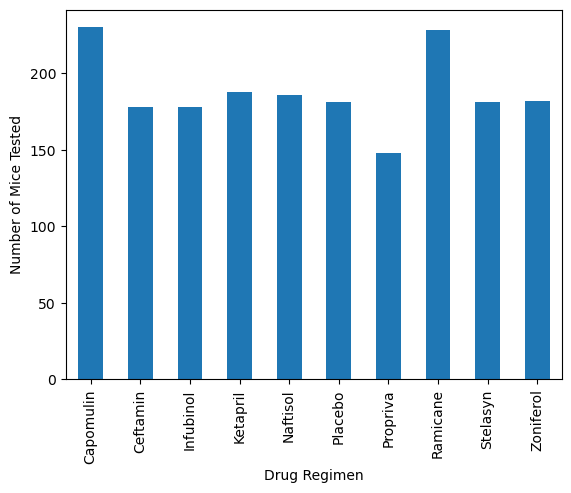

In [10]:
#Create bar chart
count = combined_df.groupby('Drug Regimen')['Timepoint'].count()
count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [12]:
#Creat Dataframe for bar chart
drug_reg_df = combined_df["Drug Regimen"].value_counts().reset_index()

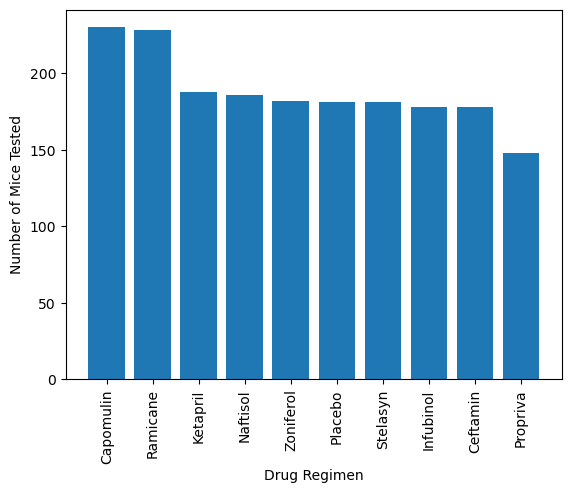

In [13]:
plt.bar(drug_reg_df["index"], drug_reg_df["Drug Regimen"])

#Add labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(rotation=90)

#Show Plot
plt.show()


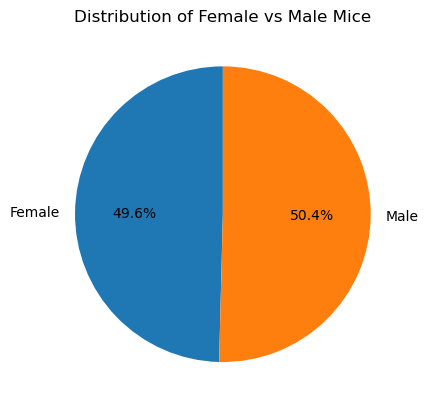

In [14]:
# Group by the "Sex" column and count the number of unique mice per gender
gender_distribution = combined_df.groupby("Sex")["Mouse ID"].nunique()

# Create a pie plot using Pandas plot() function
gender_distribution.plot(kind="pie", y="Sex", autopct="%1.1f%%", startangle=90)

# Set plot title
plt.title("Distribution of Female vs Male Mice")

# Set y-axis label to empty string
plt.ylabel("")

# Display plot
plt.show()

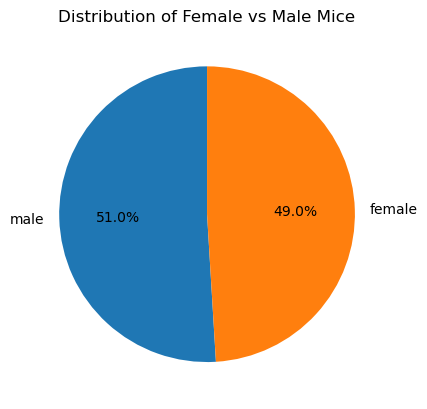

In [15]:
#Find number of Males and Females
combined_df["Sex"].value_counts()
male = combined_df["Sex"].value_counts()[0]
female = combined_df["Sex"].value_counts()[1]
gender_counts = [male,female]
genders = ["male","female"]

#Plot Pie Chart
plt.pie(gender_counts, labels=genders, autopct="%1.1f%%", startangle=90)

# Add title
plt.title("Distribution of Female vs Male Mice")

# Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_df.groupby("Mouse ID")["Timepoint"].max()

In [17]:
#Convert to Dataframe
last_timepoint_df = pd.DataFrame(last_timepoint)

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_timepoint_df = pd.merge(combined_df,last_timepoint_df,on=["Mouse ID","Timepoint"])

final_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_type_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
treatment_type_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for drug in treatment_type_list:
    temp_df = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug]
    
    tumor_vol_data.append(temp_df["Tumor Volume (mm3)"])

    #Run statistics:
    quartiles = temp_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Find outliers
    outliers = temp_df.loc[(temp_df["Tumor Volume (mm3)"] < lower_bound) | (temp_df["Tumor Volume (mm3)"] > upper_bound)]
    outlier_values = outliers["Tumor Volume (mm3)"].tolist()
    
    #Display outliers and IQR
    print(f"{drug} outliers: {outlier_values}")
    print(f"IQR: {iqr}")
    

Capomulin outliers: []
IQR: 7.781863460000004
Ramicane outliers: []
IQR: 9.098536719999998
Infubinol outliers: [36.3213458]
IQR: 11.477135160000003
Ceftamin outliers: []
IQR: 15.577752179999997


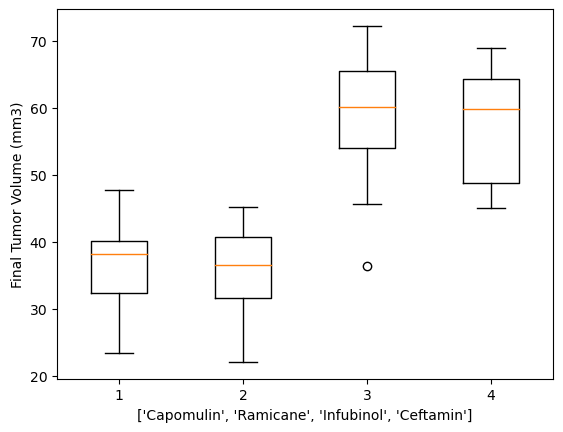

In [20]:
#Create box plot
plt.boxplot(tumor_vol_data)

#Labels
plt.xlabel(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")

#Show plot
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

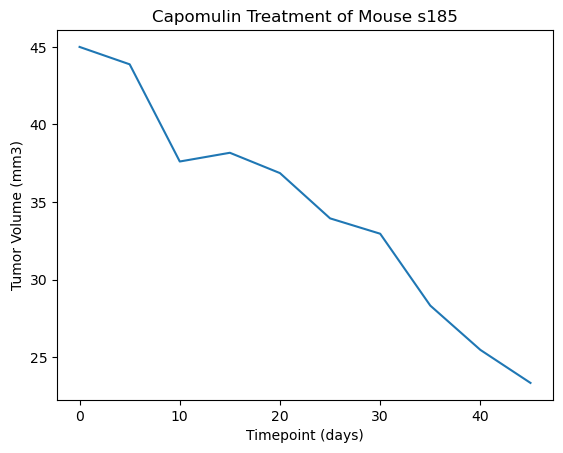

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Create a dataframe with only Capomulin-tested mice
capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin')]

#Find choosen mouse
chose_mouse_df = capomulin_df.loc[(capomulin_df["Mouse ID"] == "s185")]

plt.plot(chose_mouse_df["Timepoint"], chose_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show

In [22]:
#Create dataframe grouped by mouse id
capomulin_grouped_df = capomulin_df.groupby("Mouse ID").mean()
capomulin_grouped_df = pd.DataFrame(capomulin_grouped_df)

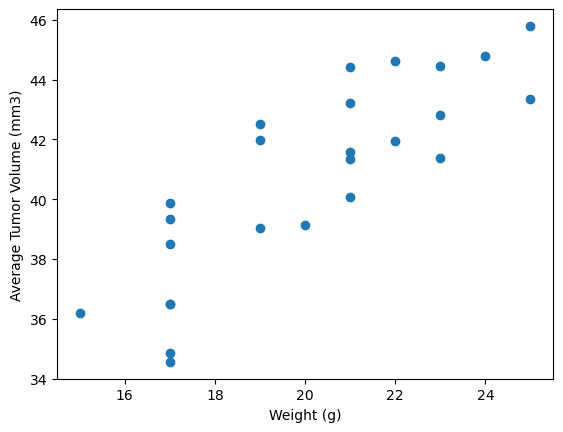

In [23]:
plt.scatter(capomulin_grouped_df["Weight (g)"], capomulin_grouped_df["Tumor Volume (mm3)"])

#labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show chart
plt.show()

## Correlation and Regression

In [24]:
#Calulate correlation
weight_volume_corralation = st.pearsonr(capomulin_grouped_df["Weight (g)"],capomulin_grouped_df["Tumor Volume (mm3)"])
weight_volume_corralation[0]
rounded_wv_cor = round(weight_volume_corralation[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {rounded_wv_cor}")

The correlation between mouse weight and the average tumor volume is 0.84


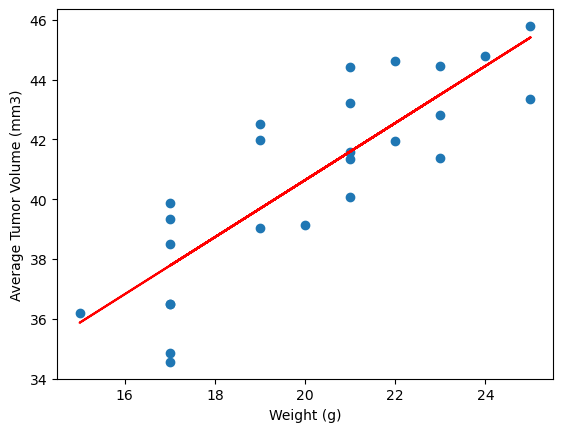

In [25]:
#linear regression model
x_values = capomulin_grouped_df["Weight (g)"]
y_values = capomulin_grouped_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()